In [3]:
from sympy import *
import numpy as np
import cpymad as Madx
from matplotlib import pyplot as plt
import sympy


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_ellipse(beta, alpha, epsilon, ax, x0=0, px0=0, facecolor='black', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    
    gamma = (1+alpha**2)/beta
    cov = epsilon*np.array([[beta, -alpha], [-alpha, gamma]])
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0])
    mean_x = x0

    scale_y = np.sqrt(cov[1, 1])
    mean_y = px0

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

### Exercise 4 - Extraction of the beam.

We have four correctors, $C1, C2, C3, C4$, and a kicker in addition to the lattice from Exercise 3. 

Text(0.5, 0, 's')

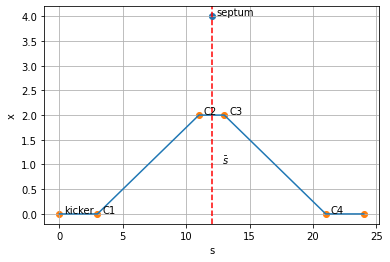

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [ 0, 3, 11, 13, 21, 24]
y = [ 0, 0, 2, 2, 0, 0]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')


plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')
plt.xlabel('s')

### Transport Matrix calculation

We need to find the strength and position of the correctors and the kicker, to allow us to have a $x$ and $x'$ appropriate for the extraction. 



Let $M_{(s_1|s_2)}$ be the transfer matrix for the lattice position from location s1 to s2, which is defined by the courant snyder parameters, $\beta$, $\alpha$, and the phase $\mu$, defined in the lectures. 




In [81]:
# define the symbols

betas1 = Symbol(r'\beta_{s_1}') # madx beta 1 
betas2 = Symbol(r'\beta_{s_2}')


dmu = Symbol('\Delta \mu')
mus1 = Symbol(r'\mu_{s_1}')
mus2 = Symbol(r'\mu_{s2}')


alfs1 = Symbol(r'\alpha_{s_1}')
alfs2 = Symbol(r'\alpha_{s_2}')


Matrix([[sqrt(betas2/betas1)*(cos(mus2-mus1) + alfs1*sin(mus2-mus1)), sqrt(betas2
               *betas1)*sin(mus2-mus1)],
              [  (-alfs2-alfs1)/sqrt(betas2*betas1)*cos(mus2-mus1)
               -(1+alfs2*alfs1)/sqrt(betas2*betas1)*sin(mus2-mus1),   
               sqrt(betas1/betas2)*(cos(mus2-mus1)-alfs2*sin(mus2-mus1))]] ) 


Matrix([
[                                                                              sqrt(\beta_{s_2}/\beta_{s_1})*(\alpha_{s_1}*sin(\mu_{s2} - \mu_{s_1}) + cos(\mu_{s2} - \mu_{s_1})),                                             sqrt(\beta_{s_1}*\beta_{s_2})*sin(\mu_{s2} - \mu_{s_1})],
[(-\alpha_{s_1} - \alpha_{s_2})*cos(\mu_{s2} - \mu_{s_1})/sqrt(\beta_{s_1}*\beta_{s_2}) - (\alpha_{s_1}*\alpha_{s_2} + 1)*sin(\mu_{s2} - \mu_{s_1})/sqrt(\beta_{s_1}*\beta_{s_2}), sqrt(\beta_{s_1}/\beta_{s_2})*(-\alpha_{s_2}*sin(\mu_{s2} - \mu_{s_1}) + cos(\mu_{s2} - \mu_{s_1}))]])

Let $M_{(s_1|s_2)}^{ij}$ be the elements of the matrix: 


$$ 
M_{(s_1|s_2)} = {\begin{bmatrix} M_{(s_1|s_2)}^{11} & M_{(s_1|s_2)}^{12}  \\
M_{(s_1|s_2)}^{21} &  M_{(s_1|s_2)}^{22}\end{bmatrix}}
$$

Text(0, 0.5, 'x')

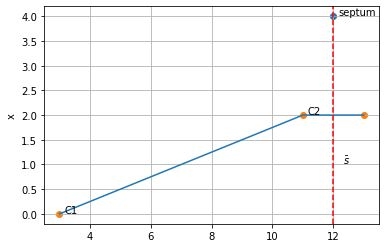

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [3, 11, 13]
y = [0, 2, 2]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
#ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
#ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
#ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')

plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')

Then, the offset at the septum produced by the correctors is given by:

$$
\underline{\Delta x_{\overline{s}}} = M_{(c1|\overline{s})} \underline{\Delta x_{c1}}
+ M_{(c2|\overline{s})} \underline{\Delta x_{c2}}
$$

Since the correctors only provide a change in angle we can simplify and regroup:

$$ 
\Delta x_{\overline{s}} = {M_{(c1|\overline{s})}^{12}} {\Delta x'_{c1}} 
+ {M_{(c2|\overline{s})}^{12}} {\Delta x'_{c2}} 
$$ and  

$$\Delta x'_{\overline{s}} = {M_{(c1|\overline{s})}^{22}} {\Delta x'_{c1}} +
{M_{(c2|\overline{s})}^{22}} {\Delta x'_{c2}} $$

Thus: 

$$
\underline{\Delta x_s} = M_{c1,c2}^* \begin{bmatrix} \Delta x'_{c1} \\ \Delta x'_{c2} \end{bmatrix} = 
M_{c1,c2}^*\underline{\Delta x'}
$$

Where $$M_{c1,c2}^* = \begin{bmatrix} M^{12}_{(c1|\overline{s})} & M^{12}_{(c2|\overline{s})}  \\
M^{22}_{(c1|\overline{s})} &  M^{22}_{(c2|\overline{s})}  \end{bmatrix}$$ 

So, the needed correction is 

$$\underline{\Delta x'} = M_{c1,c2}^{*-1}\underline{\Delta x_s} $$,

which has a solution as long as $det{M_{c1, c2}^*} \neq 0$

The goal is to have $$\begin{bmatrix} x_s \\ x_s'  \end{bmatrix}  = \begin{bmatrix} 2 mm \\  0 \end{bmatrix}$$

With the non-linearities, e.g. the sextupoles,  we can compute the needed correction iteratively to reach the required 2mm. 

In [11]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Newton_iteration.png", width=400, height=400)

$$
\underline{\Delta x'|_{n+1}} = M_{c1,c2}|_n^{*-1}\underline{\Delta x_{\underline{s}}|_n}
$$

# Correctors 3, 4

Text(0.5, 0, 's')

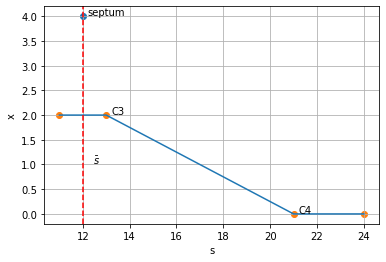

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [11, 13, 21, 24]
y = [2, 2, 0, 0]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
#ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

#ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
#ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')


plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')
plt.xlabel('s')

Basically the same as c1, c2 but 'coming from the other side'.

# The kicker

Text(0.5, 0, 's')

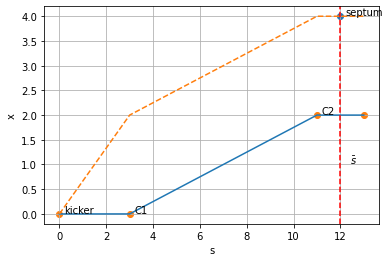

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

deltak = 2

x = [ 0, 3, 11, 13]
y = [ 0, 0, 2, 2]
yk = [ 0, 0+deltak, 2+deltak, 2+deltak]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
plt.plot(x, yk, linestyle='dashed')
ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
#ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
#ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')


plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')
plt.xlabel('s')

Similar argument to before, but only 1 degree of freedom

$$ 
\Delta x_{\overline{s}} = {M_{(k|\overline{s})}^{12}} {\Delta x'_{k}} 
$$ and  

$$
\Delta x'_{\overline{s}} = {M_{(k|\overline{s})}^{22}} {\Delta x'_{k}}
$$

Therefore, for an extra position offset:

$$ 
\Delta x_{\overline{s}}/{M_{(k|\overline{s})}^{12}} = {\Delta x'_{k}} 
$$

But we cannot control the displacement in angle we produce:

$$
\Delta x'_{\overline{s}} = {M_{(k|\overline{s})}^{22}}{\Delta x'_{k}}
$$

In [82]:
kick_prop = 1/(sqrt(betas2*betas1)*sin(mus2-mus1))
kick_prop

1/(sqrt(\beta_{s_1}*\beta_{s_2})*sin(\mu_{s2} - \mu_{s_1}))

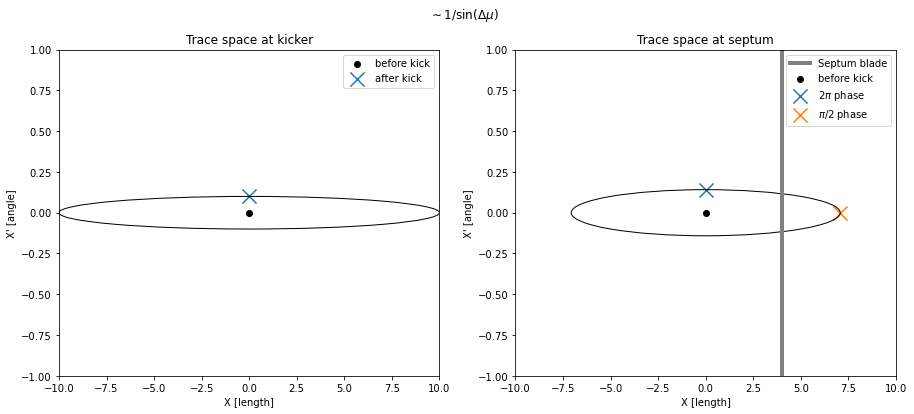

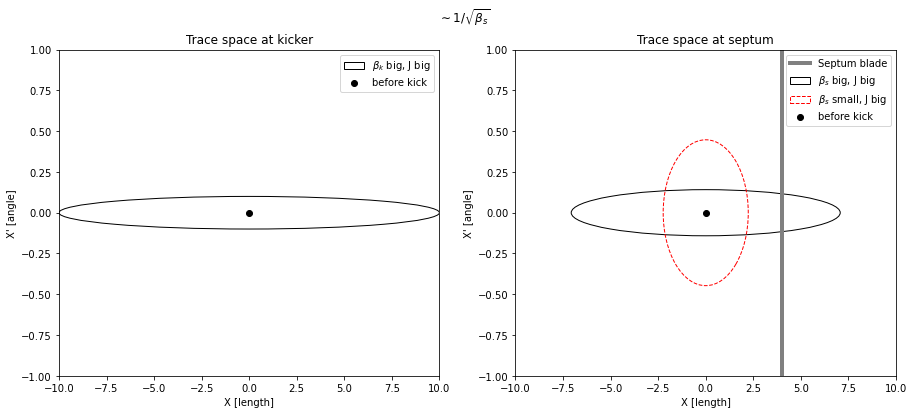

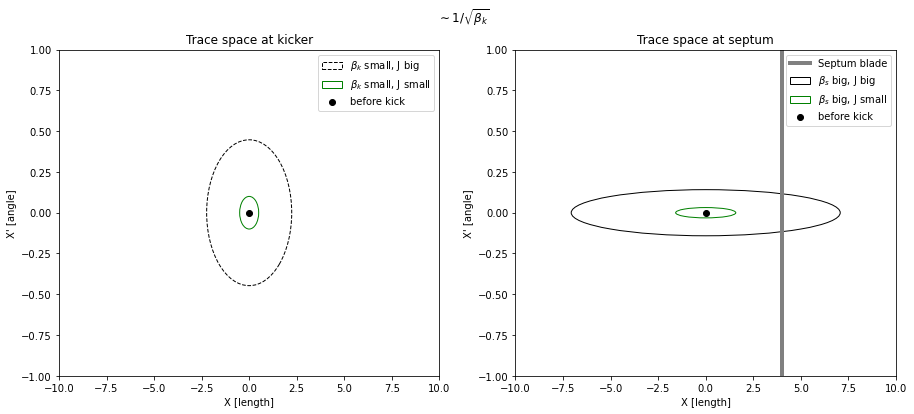

In [84]:
# phase

f, ax = plt.subplots(1, 2, figsize=(15, 6))
f.suptitle(f'$\sim 1/\sin(\Delta \mu)$')
plot_ellipse(beta=100, alpha=0, epsilon=1, ax=ax[0],
            facecolor='none', edgecolor='black')
ax[0].set_ylim(-1, 1)
ax[0].scatter(0, 0, color='k', label='before kick')
ax[0].scatter(0, np.sqrt(1/100), marker='x', s=200, label='after kick')
ax[0].set_xlim(-10, 10)
ax[0].set_ylabel("X' [angle]")
ax[0].set_xlabel('X [length]')
ax[0].set_title('Trace space at kicker')
ax[0].legend()

plot_ellipse(beta=50, alpha=0, epsilon=1, ax=ax[1],
            facecolor='none', edgecolor='black')
ax[1].set_ylim(-1, 1)
ax[1].scatter(0, 0, color='k', label='before kick')
ax[1].scatter(0, np.sqrt(1/50), marker='x', s=200, label=r'$2\pi$ phase')
ax[1].scatter(np.sqrt(50), 0, marker='x', s=200, label=r'$\pi/2$ phase')
ax[1].set_xlim(-10, 10)
ax[1].set_ylabel("X' [angle]")
ax[1].set_xlabel('X [length]')
ax[1].set_title('Trace space at septum')
ax[1].axvline(4, label='Septum blade', color='gray', linewidth=4)
ax[1].legend()

# beta septum

f, ax = plt.subplots(1, 2, figsize=(15, 6))
f.suptitle(r'$\sim 1/ \sqrt{\beta_s}$')
plot_ellipse(beta=100, alpha=0, epsilon=1, ax=ax[0], label=r'$\beta_k$ big, J big',
            facecolor='none', edgecolor='black')
ax[0].set_ylim(-1, 1)
ax[0].scatter(0, 0, color='k', label='before kick')
ax[0].set_xlim(-10, 10)
ax[0].set_ylabel("X' [angle]")
ax[0].set_xlabel('X [length]')
ax[0].set_title('Trace space at kicker')
ax[0].legend()

plot_ellipse(beta=50, alpha=0, epsilon=1, ax=ax[1], label=r'$\beta_s$ big, J big',
            facecolor='none', edgecolor='black')
plot_ellipse(beta=5, alpha=0, epsilon=1, ax=ax[1],facecolor='none', linestyle='dashed',
             edgecolor='red', label=r'$\beta_s$ small, J big')
ax[1].set_ylim(-1, 1)
ax[1].scatter(0, 0, color='k', label='before kick')
ax[1].set_xlim(-10, 10)
ax[1].set_ylabel("X' [angle]")
ax[1].set_xlabel('X [length]')
ax[1].set_title('Trace space at septum')
ax[1].axvline(4, label='Septum blade', color='gray', linewidth=4)
ax[1].legend()

# beta kicker

f, ax = plt.subplots(1, 2, figsize=(15, 6))
f.suptitle(r'$\sim 1/\sqrt{\beta_k}$')
plot_ellipse(beta=5, alpha=0, epsilon=1, ax=ax[0],facecolor='none', linestyle='dashed',
             edgecolor='black', label=r'$\beta_k$ small, J big')
plot_ellipse(beta=5, alpha=0, epsilon=0.05, ax=ax[0],facecolor='none',
             edgecolor='green', label=r'$\beta_k$ small, J small')
ax[0].set_ylim(-1, 1)
ax[0].set_xlim(-10, 10)
ax[0].scatter(0, 0, color='k', label='before kick')
ax[0].set_ylabel("X' [angle]")
ax[0].set_xlabel('X [length]')
ax[0].set_title('Trace space at kicker')
ax[0].legend()

plot_ellipse(beta=50, alpha=0, epsilon=1, ax=ax[1], label=r'$\beta_s$ big, J big',
            facecolor='none', edgecolor='black')
plot_ellipse(beta=50, alpha=0, epsilon=0.05, ax=ax[1],facecolor='none',
             edgecolor='green', label=r'$\beta_s$ big, J small')
ax[1].set_ylim(-1, 1)
ax[1].set_xlim(-10, 10)
ax[1].scatter(0, 0, color='k', label='before kick')
ax[1].set_ylabel("X' [angle]")
ax[1].set_xlabel('X [length]')
ax[1].set_title('Trace space at septum')
ax[1].axvline(4, label='Septum blade', color='gray', linewidth=4)
ax[1].legend()

In [87]:
delta_xp_prop = (sqrt(betas1/betas2)*(cos(mus2-mus1)-alfs2*sin(mus2-mus1)))
delta_xp_prop

sqrt(\beta_{s_1}/\beta_{s_2})*(-\alpha_{s_2}*sin(\mu_{s2} - \mu_{s_1}) + cos(\mu_{s2} - \mu_{s_1}))

If we want to keep $\Delta x'_{\overline{s}}$ at 0 we must satisfy:

$$\tan\Delta\mu = \frac{1}{\alpha_{\overline{s}}}$$

For $$\Delta \mu = \pi/2$$, we need $\alpha=0$ or we will also introduce some angle. 

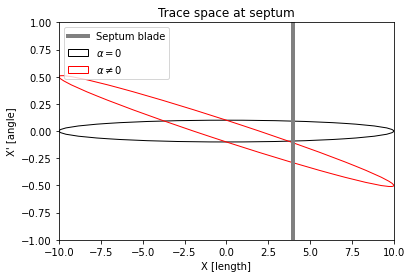

In [86]:
f, ax = plt.subplots()
plot_ellipse(beta=100, alpha=0, epsilon=1, ax=ax, label=r'$\alpha=0$', facecolor='none',
            edgecolor='black')
plot_ellipse(beta=100, alpha=5, epsilon=1, ax=ax,facecolor='none',
             edgecolor='red', label=r'$\alpha \neq 0$')
ax.set_ylim(-1, 1)
ax.set_xlim(-10, 10)
ax.set_ylabel("X' [angle]")
ax.set_xlabel('X [length]')
ax.set_title('Trace space at septum')
ax.axvline(4, label='Septum blade', color='gray', linewidth=4)
ax.legend()

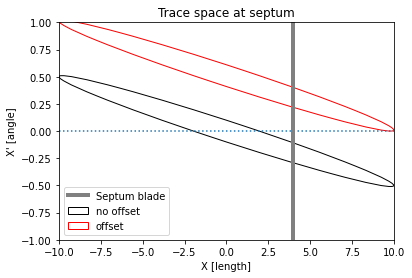

In [85]:
# We could introduce an angle on our corrector orbit to compensate for this

f, ax = plt.subplots()
plot_ellipse(beta=100, alpha=5, epsilon=1, ax=ax,facecolor='none',
             edgecolor='black', label=r'no offset')
plot_ellipse(beta=100, alpha=5, epsilon=1, px0= np.sqrt((1+5**2)/100),ax=ax,facecolor='none',
             edgecolor='red', label=r'offset')
ax.set_ylim(-1, 1)
ax.set_xlim(-10, 10)
ax.set_ylabel("X' [angle]")
ax.set_xlabel('X [length]')
ax.set_title('Trace space at septum')
ax.axhline(0, linestyle='dotted')
ax.axvline(4, label='Septum blade', color='gray', linewidth=4)
ax.legend()

Text(0.5, 0, 's')

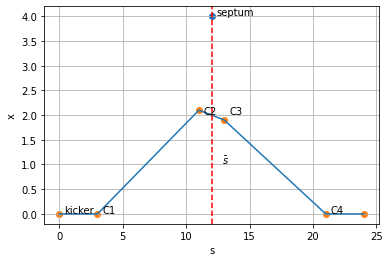

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [ 0, 3, 11, 13, 21, 24]
y = [ 0, 0, 2.1, 1.9, 0, 0]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')


plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')
plt.xlabel('s')